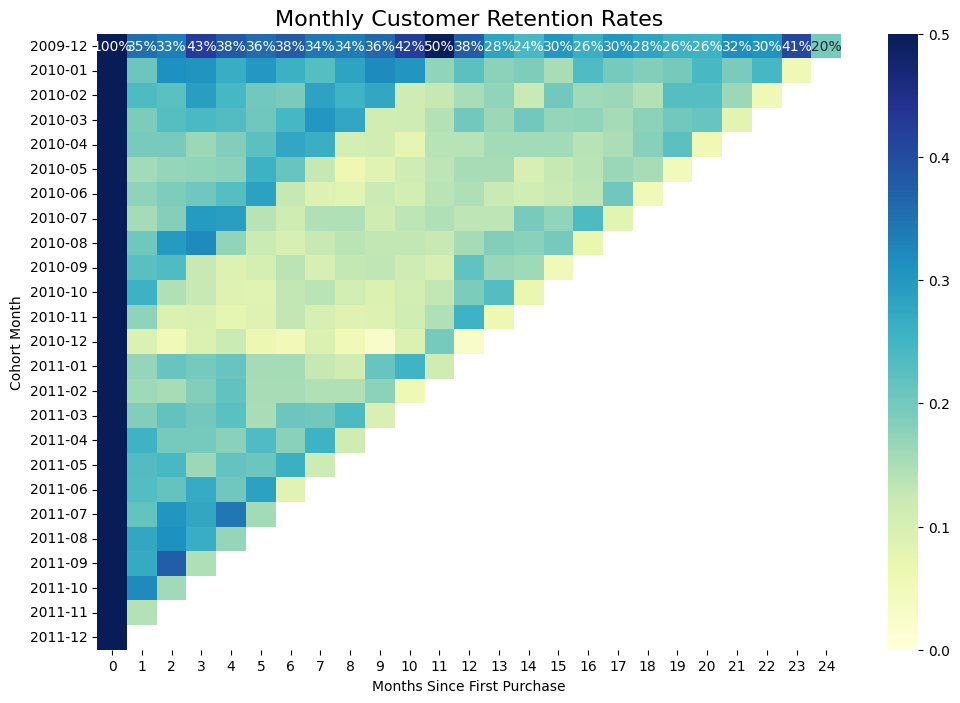

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the Analysis Data
cohort_data = pd.read_csv('../02_Processed_Data/cohort_retention_data.csv')

# 2. Pivot the data
# Rows = Cohort (Start Month)
# Columns = Month Index (0, 1, 2...)
# Values = Active Users
cohort_pivot = cohort_data.pivot(index='Cohort_Month', columns='Month_Index', values='Active_Users')

# 3. Calculate Retention Percentage
# We divide every column by the first column (Month 0) to get the % remaining
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# 4. Plot the Heatmap
plt.figure(figsize=(12, 8))
plt.title('Monthly Customer Retention Rates', fontsize=16)

# fmt='.0%' formats the numbers as percentages (e.g., 35%)
# cmap='YlGnBu' is a professional color scale (Yellow to Blue)
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0.0, vmax=0.5)

plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.yticks(rotation=0)

# 5. Save the chart
plt.savefig('../05_Insights_Reports/retention_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()